#1. Import 

In [ ]:
import torchvision.transforms as transforms
import torchvision
import torch

import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Configure Data

In [ ]:
def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, indicies):
    image = image.reshape(3,-1)
    image = image[:,indicies]
    image = image.reshape(3,32,32)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.indicies = torch.randperm(shape)
    def __call__(self,img):
        return  shuffle_pixels(img, self.indicies)

In [ ]:
BATCH_SIZE = 4

transform_train = transforms.Compose([
    #transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

#3. Upload Data  

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

validset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

for i, (input, target) in enumerate(trainloader):
  print(input.size())
  break



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([4, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


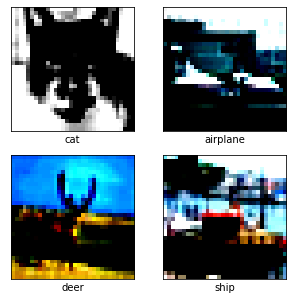

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

#4. Augment Data

##Color Jitter

In [ ]:
transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

trainset_ColorJitter = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_ColorJitter)
trainloader_ColorJitter = torch.utils.data.DataLoader(trainset_ColorJitter, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


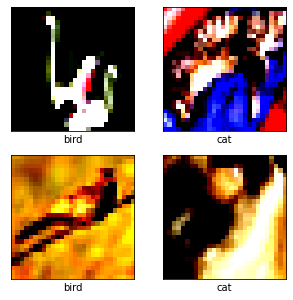

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_ColorJitter, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Crop

In [ ]:
transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

trainset_RandomCrop = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomCrop)
trainloader_RandomCrop = torch.utils.data.DataLoader(trainset_RandomCrop, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


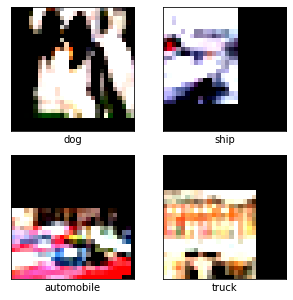

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomCrop, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Horizontal Flip

In [ ]:
transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

trainset_RandomHorizontalFlip = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomHorizontalFlip)
trainloader_RandomHorizontalFlip = torch.utils.data.DataLoader(trainset_RandomHorizontalFlip, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


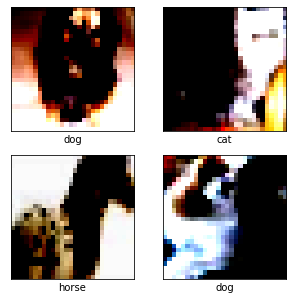

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomHorizontalFlip, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Perspective

In [ ]:
transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])
trainset_RandomPerspective = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomPerspective)
trainloader_RandomPerspective = torch.utils.data.DataLoader(trainset_RandomPerspective, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


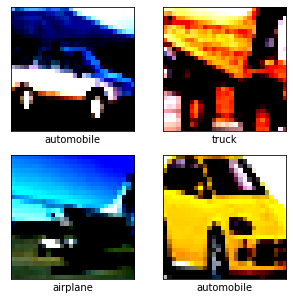

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomPerspective, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Rotation

In [ ]:
transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])
trainset_RandomRotation = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomRotation)
trainloader_RandomRotation = torch.utils.data.DataLoader(trainset_RandomRotation, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


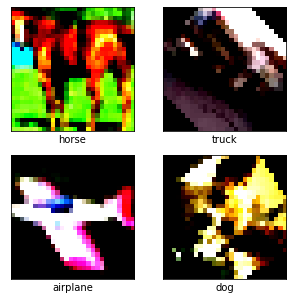

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomRotation, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Erasing

In [ ]:
transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])
trainset_RandomErasing = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomErasing)
trainloader_RandomErasing = torch.utils.data.DataLoader(trainset_RandomErasing, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


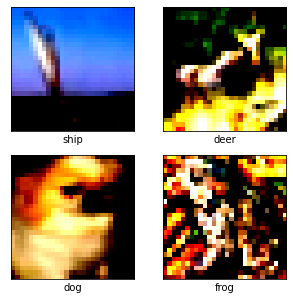

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomErasing, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Pixel Shuffling

In [ ]:
transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

trainset_Shuffle = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
trainloader_Shuffle = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


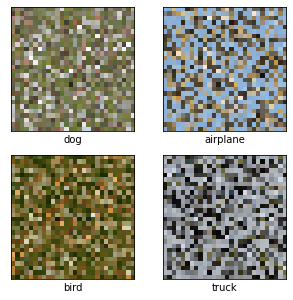

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_Shuffle, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)
    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Labels

In [ ]:
transform_train = transforms.Compose([
    #transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

trainset_RandomLabel = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

random.shuffle(trainset_RandomLabel.targets)

trainloader_RandomLabel = torch.utils.data.DataLoader(trainset_RandomLabel, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


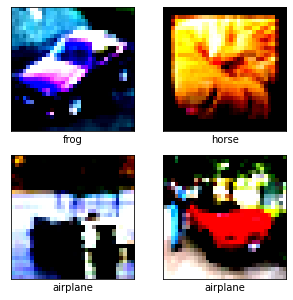

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomLabel, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

# Start Here

##Transformations

In [ ]:
transform_train = transforms.Compose([
    #transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])


transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])

transform_Shuffle = transforms.Compose([
    #transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(32*32)
    ])

##CIFAR10

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0  # is transform_train

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

for i, (input, target) in enumerate(trainloader):
  print(input.size())
  break


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([256, 3, 32, 32])


##CIFAR100

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0 #0 is transform_train

class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
	             'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'containers'	'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
                'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
                'bed', 'chair', 'couch', 'table', 'wardrobe',
	              'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
	              'bear', 'leopard', 'lion', 'tiger', 'wolf',
	              'bridge', 'castle', 'house', 'road', 'skyscraper',
	              'cloud', 'forest', 'mountain', 'plain', 'sea',
	              'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
	              'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
	              'crab', 'lobster', 'snail', 'spider', 'worm',
	              'baby', 'boy', 'girl', 'man', 'woman',
	              'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
	              'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
	              'maple', 'oak', 'palm', 'pine', 'willow',
	              'bicycle', 'bus', 'motorcycle', 'pickup' 'truck', 'train',
	              'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 4

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


# Inception v3

In [ ]:
#### smaller inception for cifar10 input size 28 x 28 
class Con(nn.Module):
  def __init__(self, in_channel, c, k, s):
      super(Inception, self).__init__()
      self.branch1 = nn.Sequential(
          Conv2d(in_channel, C, kernel_size = k,stride = s, padding=0),
          nn.BatchNorm2d(C),
          nn.ReLU()
      )
    
  def forward(self, x):
      branch1 = self.branch1(x)
      # branch2 = self.branch2(x)
      # nn.BatchNorm2d(8)
      # return torch.cat([branch1, branch2], 1) 
      return branch1

class Inception(nn.Module):
  def __init__(self, in_channel, ch1, ch3):
      super(Inception, self).__init__()
      self.branch1 = nn.Sequential(
          ConvBlock(in_channel, ch1, kernel_size = 1,stride=1, padding=0),
          nn.BatchNorm2d(ch1),
          nn.ReLU()
      )
      
      self.branch2 = nn.Sequential(
          ConvBlock(in_channel, ch3, kernel_size = 3,stride=1, padding=1),
          nn.BatchNorm2d(ch3),
          nn.ReLU()
      )
      
  def forward(self, x):
      branch1 = self.branch1(x)
      branch2 = self.branch2(x)
      return torch.cat([branch1, branch2], 1) 

class Downsampling(nn.Module):
  def __init__(self, ch3):
      super(Inception, self).__init__()
      self.branch1 = nn.Sequential(
          ConvBlock(in_channel, ch3, kernel_size = 3,stride=2, padding=0),
          nn.BatchNorm2d(ch3),
          nn.ReLU()
      )
      
      self.branch2 = nn.Sequential(
          nn.MaxPool2d(3, stride=2)
      )
      
  def forward(self, x):
      branch1 = self.branch1(x)
      branch2 = self.branch2(x)
      return torch.cat([branch1, branch2], 1) 

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 96, kernel_size=3, stride = 1),
                                   nn.BatchNorm2d(96),
                                   nn.ReLU())

        self.incept1 = Inception(in_channels=96, 32, 32) #in_channel, ch1, ch3
        self.incept2 = Inception(in_channels=96, 32, 48)
        self.ds1 = Downsampling(80)

        self.incept3 = Inception(in_channels=10, 112,48)
        self.incept4 = Inception(in_channels=20, 96, 64)
        self.incept5 = Inception(in_channels=10, 80, 80)
        self.incept6 = Inception(in_channels=20, 48, 96)
        self.ds2 = Downsampling(96)

        self.incept7 = Inception(in_channels=10, 176, 160)
        self.incept8 = Inception(in_channels=20, 176, 160)
        self.mp = nn.MeanPool2d(7)

        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = self.conv1(x)

        x = self.ds1(self.incept2(self.incept1(x)))

        x = self.incept6(self.incept5(self.incept4(self.incept3(x))))
        x = self.ds2(x)

        x = self.mp(self.incept8(self.incept7(x)))

        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)

        return F.log_softmax(x)


In [ ]:
# model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained=True)

In [ ]:
def train_model(args, model, train_loader, val_loader,
                start_epoch=None, epochs=None):
  cudnn.benchmark = True

  # define loss function (criterion) and pptimizer
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.SGD(model.parameters(), 0.1,#args.learning_rate,
                              momentum= 0.9, #args.momentum,
                              weight_decay=1e-4)

  start_epoch = start_epoch or 0
  epochs = epochs or 300

  for epoch in range(start_epoch, epochs):
    adjust_learning_rate(optimizer, epoch, args)

    # train for one epoch
    tr_loss, tr_prec1 = train_epoch(train_loader, model, criterion, optimizer, epoch, args)

    # evaluate on validation set
    val_loss, val_prec1 = validate_epoch(val_loader, model, criterion, epoch, args)

    if args.eval_full_trainset:
      tr_loss, tr_prec1 = validate_epoch(train_loader, model, criterion, epoch, args)

    logging.info('%03d: Acc-tr: %6.2f, Acc-val: %6.2f, L-tr: %6.4f, L-val: %6.4f',
                 epoch, tr_prec1, val_prec1, tr_loss, val_loss)


def train_epoch(train_loader, model, criterion, optimizer, epoch, args):
  """Train for one epoch on the training set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to train mode
  model.train()

  for i, (input, target) in enumerate(train_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

    # compute gradient and do SGD step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return losses.avg, top1.avg


def validate_epoch(val_loader, model, criterion, epoch, args):
  """Perform validation on the validation set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to evaluate mode
  model.eval()

  for i, (input, target) in enumerate(val_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input, volatile=True)
    target_var = torch.autograd.Variable(target, volatile=True)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

  return losses.avg, top1.avg


class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch):
  """Sets the learning rate to the initial LR decayed by 10 after 150 and 225 epochs"""
  lr = 0.1 * (0.1 ** (epoch // 150)) * (0.1 ** (epoch // 225)) #args.learning_rate
  for param_group in optimizer.param_groups:
      param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
  """Computes the precision@k for the specified values of k"""
  maxk = max(topk)
  batch_size = target.size(0)

  _, pred = output.topk(maxk, 1, True, True)
  pred = pred.t()
  correct = pred.eq(target.view(1, -1).expand_as(pred))

  res = []
  for k in topk:
      correct_k = correct[:k].view(-1).float().sum(0)
      res.append(correct_k.mul_(100.0 / batch_size))
  return res


def setup_logging(args):
  import datetime
  exp_dir = os.path.join('runs', args.exp_name)
  if not os.path.isdir(exp_dir):
    os.makedirs(exp_dir)
  log_fn = os.path.join(exp_dir, "LOG.{0}.txt".format(datetime.date.today().strftime("%y%m%d")))
  logging.basicConfig(filename=log_fn, filemode='w', level=logging.DEBUG)
  # also log into console
  console = logging.StreamHandler()
  console.setLevel(logging.INFO)
  logging.getLogger('').addHandler(console)
  print('Logging into %s...' % exp_dir)


def main():
  args = cmd_args.parse_args()
  setup_logging(args)

  if args.command == 'train':
    train_loader =  
    val_loader = get_data_loaders(args, shuffle_train=True)
    model = get_model(args)
    logging.info('Number of parameters: %d', sum([p.data.nelement() for p in model.parameters()]))
    train_model(args, model, train_loader, val_loader)


if __name__ == '__main__':
  main()

SyntaxError: ignored

# WideResNet

In [ ]:
# Wide Resnet model adapted from https://github.com/xternalz/WideResNet-pytorch
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
  def __init__(self, in_planes, out_planes, stride, dropRate=0.0):
    super(BasicBlock, self).__init__()
    self.bn1 = nn.BatchNorm2d(in_planes)
    self.relu1 = nn.ReLU(inplace=True)
    self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                            padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(out_planes)
    self.relu2 = nn.ReLU(inplace=True)
    self.conv2 = nn.Conv2d(out_planes, out_planes, kernel_size=3, stride=1,
                            padding=1, bias=False)
    self.droprate = dropRate
    self.equalInOut = (in_planes == out_planes)
    self.convShortcut = (not self.equalInOut) and nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride,
                                                            padding=0, bias=False) or None

  def forward(self, x):
    if not self.equalInOut:
      x = self.relu1(self.bn1(x))
      out = self.conv1(x)
    else:
      out = self.conv1(self.relu1(self.bn1(x)))

    if self.droprate > 0:
      out = F.dropout(out, p=self.droprate, training=self.training)
    out = self.conv2(self.relu2(self.bn2(out)))
    if not self.equalInOut:
      return torch.add(self.convShortcut(x), out)
    else:
      return torch.add(x, out)


class NetworkBlock(nn.Module):
  def __init__(self, nb_layers, in_planes, out_planes, block, stride, dropRate=0.0):
    super(NetworkBlock, self).__init__()
    self.layer = self._make_layer(
        block, in_planes, out_planes, nb_layers, stride, dropRate)

  def _make_layer(self, block, in_planes, out_planes, nb_layers, stride, dropRate):
    layers = []
    for i in range(nb_layers):
        layers.append(block(i == 0 and in_planes or out_planes,
                            out_planes, i == 0 and stride or 1, dropRate))
    return nn.Sequential(*layers)

  def forward(self, x):
    return self.layer(x)


class WideResNet(nn.Module):
  def __init__(self, depth, num_classes, widen_factor=1, drop_rate=0.0, init_scale=1.0):
    super(WideResNet, self).__init__()

    nChannels = [16, 16 * widen_factor,
                  32 * widen_factor, 64 * widen_factor]
    assert((depth - 4) % 6 == 0)
    n = (depth - 4) // 6
    block = BasicBlock
    # 1st conv before any network block
    self.conv1 = nn.Conv2d(3, nChannels[0], kernel_size=3, stride=1,
                            padding=1, bias=False)
    # 1st block
    self.block1 = NetworkBlock(
        n, nChannels[0], nChannels[1], block, 1, drop_rate)
    # 2nd block
    self.block2 = NetworkBlock(
        n, nChannels[1], nChannels[2], block, 2, drop_rate)
    # 3rd block
    self.block3 = NetworkBlock(
        n, nChannels[2], nChannels[3], block, 2, drop_rate)
    # global average pooling and classifier
    self.bn1 = nn.BatchNorm2d(nChannels[3])
    self.relu = nn.ReLU(inplace=True)
    self.fc = nn.Linear(nChannels[3], num_classes)
    self.nChannels = nChannels[3]

    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, init_scale * math.sqrt(2. / n))
      elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
      elif isinstance(m, nn.Linear):
        m.bias.data.zero_()

        size = m.weight.size()
        fan_out = size[0] # number of rows
        fan_in = size[1] # number of columns
        variance = math.sqrt(2.0/(fan_in + fan_out))
        m.weight.data.normal_(0.0, init_scale * variance)


  def forward(self, x):
    out = self.forward_repr(x)
    return self.fc(out)

  def forward_repr(self, x):
    out = self.conv1(x)
    out = self.block1(out)
    out = self.block2(out)
    out = self.block3(out)
    out = self.relu(self.bn1(out))
    out = F.avg_pool2d(out, 8)
    out = out.view(-1, self.nChannels)
    return out

# MLP

In [ ]:
import math
import copy
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
  def __init__(self, n_units, init_scale=1.0):
    super(MLP, self).__init__()

    self._n_units = copy.copy(n_units)
    self._layers = []
    for i in range(1, len(n_units)):
      layer = nn.Linear(n_units[i-1], n_units[i], bias=False)
      variance = math.sqrt(2.0 / (n_units[i-1] + n_units[i]))
      layer.weight.data.normal_(0.0, init_scale * variance)
      self._layers.append(layer)

      name = 'fc%d' % i
      if i == len(n_units) - 1:
        name = 'fc'  # the prediction layer is just called fc
      self.add_module(name, layer)


  def forward(self, x):
    x = x.view(-1, self._n_units[0])
    out = self._layers[0](x)
    for layer in self._layers[1:]:
      out = F.relu(out)
      out = layer(out)
    return out

# Training

In [ ]:
from __future__ import print_function

import os
import logging
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.optim


def train_model(model, train_loader, val_loader,start_epoch=None, epochs=300):
  cudnn.benchmark = True

  # define loss function (criterion) and pptimizer
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.SGD(model.parameters(), 0.01,
                              momentum=0.9,
                              weight_decay=1e-4)

  start_epoch = start_epoch or 0
  epochs = epochs

  tr_prec1 = 0
  while tr_prec1 < 100:
    for epoch in range(start_epoch, epochs):
      adjust_learning_rate(optimizer, epoch, 0.1)

      # train for one epoch
      tr_loss, tr_prec1 = train_epoch(train_loader, model, criterion, optimizer, epoch)

      # evaluate on validation set
      val_loss, val_prec1 = validate_epoch(val_loader, model, criterion, epoch)

      #if args.eval_full_trainset:
      #  tr_loss, tr_prec1 = validate_epoch(train_loader, model, criterion, epoch, args)

      logging.info('%03d: Acc-tr: %6.2f, Acc-val: %6.2f, L-tr: %6.4f, L-val: %6.4f',
                    epoch, tr_prec1, val_prec1, tr_loss, val_loss)
      torch.save(model.state_dict(), "/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/WRN/WRNModel")
      

def get_model(model):
  # create model
  if model == 'wide-resnet':
    model = WideResNet(28, 10, 1,drop_rate=0.0)

  elif model == 'mlp':
    n_units = [int(x) for x in '512'.split('x')] # hidden dims
    n_units.append(10)  # output dim
    n_units.insert(0, 32*32*3)        # input dim
    model = MLP(n_units)

  # for training on multiple GPUs.
  # Use CUDA_VISIBLE_DEVICES=0,1 to specify which GPUs to use
  # model = torch.nn.DataParallel(model).cuda()
  model = model.cuda()

  return model

def train_epoch(train_loader, model, criterion, optimizer, epoch):
  """Train for one epoch on the training set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to train mode
  model.train()

  for i, (input, target) in enumerate(train_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

    # compute gradient and do SGD step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return losses.avg, top1.avg


def validate_epoch(val_loader, model, criterion, epoch):
  """Perform validation on the validation set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to evaluate mode
  model.eval()

  for i, (input, target) in enumerate(val_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input, volatile=True)
    target_var = torch.autograd.Variable(target, volatile=True)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

  return losses.avg, top1.avg


class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch, lr_0):
  """Sets the learning rate to the initial LR decayed by 10 after 150 and 225 epochs"""
  lr = lr_0 * (0.1 ** (epoch // 150)) * (0.1 ** (epoch // 225))
  for param_group in optimizer.param_groups:
      param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
  """Computes the precision@k for the specified values of k"""
  maxk = max(topk)
  batch_size = target.size(0)

  _, pred = output.topk(maxk, 1, True, True)
  pred = pred.t()
  correct = pred.eq(target.view(1, -1).expand_as(pred))

  res = []
  for k in topk:
      correct_k = correct[:k].view(-1).float().sum(0)
      res.append(correct_k.mul_(100.0 / batch_size))
  return res

def setup_logging(name):
  import datetime
  exp_dir = os.path.join('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs', name)
  if not os.path.isdir(exp_dir):
    os.makedirs(exp_dir)
  log_fn = os.path.join(exp_dir, "LOG.{0}.txt".format(datetime.date.today().strftime("%y%m%d")))
  logging.basicConfig(filename=log_fn, filemode='w', level=logging.DEBUG)
  # also log into console
  console = logging.StreamHandler()
  console.setLevel(logging.INFO)
  logging.getLogger('').addHandler(console)

def main(name, model, train):
  setup_logging(name)
  if train == 'train':
    train_loader = trainloader
    #for i, (input, target) in enumerate(train_loader):
    #  print(input.size())
    #  break
    val_loader = valloader
    model = get_model(model)
    logging.info('Number of parameters: %d', sum([p.data.nelement() for p in model.parameters()]))
    train_model(model, train_loader, val_loader)


# Results

Baseline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
main("WRN",'wide-resnet','train')

Mounted at /content/drive


Number of parameters: 369498
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  44.70, Acc-val:  47.35, L-tr: 1.5010, L-val: 1.5463
001: Acc-tr:  65.28, Acc-val:  61.02, L-tr: 0.9670, L-val: 1.0985
002: Acc-tr:  73.16, Acc-val:  68.17, L-tr: 0.7556, L-val: 0.9449
003: Acc-tr:  77.77, Acc-val:  72.82, L-tr: 0.6327, L-val: 0.7928
004: Acc-tr:  80.90, Acc-val:  76.49, L-tr: 0.5476, L-val: 0.6716
005: Acc-tr:  82.98, Acc-val:  66.23, L-tr: 0.4891, L-val: 1.1404
006: Acc-tr:  85.03, Acc-val:  76.35, L-tr: 0.4288, L-val: 0.6828
007: Acc-tr:  86.50, Acc-val:  77.70, L-tr: 0.3843, L-val: 0.6915
008: Acc-tr:  87.91, Acc-val:  78.71, L-tr: 0.3438, L-val: 0.6668
009: Acc-tr:  89.23, Acc-val:  77.42, L-tr: 0.3072, L-val

KeyboardInterrupt: ignored

Random Labels

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=selectedTransform)
random.shuffle(trainset.targets)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

from google.colab import drive
drive.mount('/content/drive')
main("WRN Random Label",'wide-resnet','train')

Files already downloaded and verified
Files already downloaded and verified
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of parameters: 369498
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  10.13, Acc-val:   8.66, L-tr: 2.3151, L-val: 2.3162
001: Acc-tr:  10.49, Acc-val:  10.37, L-tr: 2.3053, L-val: 2.3136
002: Acc-tr:  10.83, Acc-val:  10.62, L-tr: 2.3023, L-val: 2.3044
003: Acc-tr:  11.33, Acc-val:  11.30, L-tr: 2.2999, L-val: 2.3041
004: Acc-tr:  12.01, Acc-val:   9.35, L-tr: 2.2970, L-val: 2.3105
005: Acc-tr:  12.34, Acc-val:  12.83, L-tr: 2.2952, L-val: 2.2934
006: Acc-tr:  12.93, Acc-val:  10.68, L-tr: 2.2898, L-val: 2.3157
007: Acc-tr:  13.36, Acc-val:   9.69, L-tr: 2.2864, L-val: 2.3147
008: Acc-tr:  13.74, Acc-val:  10.33, L-tr: 2.2808, L-val: 2.3288
009: Acc-tr:  14.42, Acc-val:  10.94, L-tr: 2.2738, L-val

KeyboardInterrupt: ignored

Pixel Shuffle

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
random.shuffle(trainset.targets)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform_Shuffle)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


for i, (input, target) in enumerate(trainloader):
  print(input.size())
  break

main("WRN Pixel Shuffle",'wide-resnet','train')

Files already downloaded and verified
Files already downloaded and verified


Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498


torch.Size([256, 3, 32, 32])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07, Acc-val:  11.27, L-tr: 2.3186, L-val: 2.3219
000: Acc-tr:  10.07,

KeyboardInterrupt: ignored

Pixel Shuffle no Random

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform_Shuffle)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


for i, (input, target) in enumerate(trainloader):
  print(input.size())
  break

from google.colab import drive
drive.mount('/content/drive')
main("WRN Pixel No Shuffle",'wide-resnet','train')

Files already downloaded and verified
Files already downloaded and verified


Number of parameters: 369498
Number of parameters: 369498
Number of parameters: 369498


torch.Size([256, 3, 32, 32])
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
000: Acc-tr:  31.14, Acc-val:  32.32, L-tr: 1.8634, L-val: 1.9433
000: Acc-tr:  31.14, Acc-val:  32.32, L-tr: 1.8634, L-val: 1.9433
000: Acc-tr:  31.14, Acc-val:  32.32, L-tr: 1.8634, L-val: 1.9433
001: Acc-tr:  41.98, Acc-val:  39.57, L-tr: 1.5975, L-val: 1.6542
001: Acc-tr:  41.98, Acc-val:  39.57, L-tr: 1.5975, L-val: 1.6542
001: Acc-tr:  41.98, Acc-val:  39.57, L-tr: 1.5975, L-val: 1.6542
002: Acc-tr:  47.04, Acc-val:  44.07, L-tr: 1.4693, L-val: 1.5168
002: Acc-tr:  47.04, Acc-val:  44.07, L-tr: 1.4693, L-val: 1.5168
002: Acc-tr:  47.04, Acc-val:  44.07, L-tr: 1.4693, L-val: 1.5168
003: Acc-tr:  50.25, Acc-val:  48.80, L-tr: 1.3775, L-val: 1.4316
003: Acc-tr:  50.25,

KeyboardInterrupt: ignored